<a href="https://colab.research.google.com/github/DDOYEONN/BigData_Analysis_Test/blob/main/_!!%ED%95%A8%EC%88%98!!__%EC%9B%94%EB%93%9C%EC%BB%B5_%EC%B6%9C%EC%A0%84%EC%84%A0%EC%88%98_%EA%B3%A8%EA%B8%B0%EB%A1%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
데이터 출처 :https://www.kaggle.com/darinhawley/fifa-world-cup-goalscorers-19302018(참고, 데이터 수정)
데이터 설명 : 1930 ~2018년도 월드컵 출전선수 골기록
data url = https://raw.githubusercontent.com/Datamanim/datarepo/main/worldcup/worldcupgoals.csv

In [ ]:
import pandas as pd
import numpy as np
df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/worldcup/worldcupgoals.csv')
df.head()

,Player,Goals,Years,Country
0,Miroslav Klose,16,2002-2006-2010-2014,Germany
1,Ronaldo,15,1998-2002-2006,Brazil
2,Gerd Muller,14,1970-1974,Germany
3,Just Fontaine,13,1958,France
4,Pele,12,1958-1962-1966-1970,Brazil


주어진 전체 기간의 각 나라별 골득점수 상위 5개 국가와 그 득점수를 데이터프레임형태로 출력하라

In [ ]:
#!!!!!!!!!!!!!!!!!!!!!!!!각 혹은 ~별이 문제에서 나왔을 경우 일단, groupby | value_counts()를 사용해보기 !!!!!!!!!!!!!!!!!!!!!!!!

In [ ]:
#np.unique(df.Country)
df['Country'].unique()

array(['Germany', 'Brazil', 'France', 'Hungary', 'Argentina', 'England',
       'Peru', 'Poland', 'Italy', 'Portugal', 'Spain', 'Uruguay', 'Czech',
       'Netherlands', 'Austria', 'Bulgaria', 'Colombia', 'Croatia',
       'Ghana', 'Russia', 'Switzerland', 'Australia', 'Belgium',
       'Cameroon', 'Denmark', 'Northern Ireland', 'Sweden', 'USA', 'USSR',
       'Chile', 'Japan', 'Mexico', 'Nigeria', 'Romania', 'Slovakia',
       'Yugoslavia', 'Costa Rica', 'Ecuador', 'Ireland', 'Paraguay',
       'Saudi Arabia', 'Scotland', 'Senegal', 'South Korea', 'Turkey',
       'Algeria', 'Cote dIvoire', 'Cuba', 'Czech Republic', 'Egypt',
       'Haiti', 'Jamaica', 'Morocco', 'North Korea', 'Norway',
       'South Africa', 'Tunisia', 'Ukraine', 'Wales', 'Angola', 'Bolivia',
       'Bosnia Herz', 'El Salvador', 'Greece', 'Honduras', 'Iceland',
       'Iran', 'Iraq', 'Israel', 'Kuwait', 'New Zealand', 'Panama',
       'Serbia', 'Slovenia', 'Togo', 'UAE'], dtype=object)

In [ ]:
#각 나라의 선수가 몇 명인지 나옴
#기준이 출전 선수의 골 기록이기 때문에 
#count
df.groupby('Country')['Goals'].count().sort_values(ascending = False)

Country
Brazil       81
Germany      78
Italy        60
Argentina    59
France       58
             ..
Haiti         1
Angola        1
Bolivia       1
Israel        1
Iraq          1
Name: Goals, Length: 76, dtype: int64

In [ ]:
#각 나라의 선수들이 넣은 골이 합산해지는 것.
pd.DataFrame(df.groupby('Country')['Goals'].sum().sort_values(ascending = False).head(5))

,Goals
Country,
Brazil,228
Germany,226
Argentina,135
Italy,123
France,115


주어진 전체기간동안 골득점을 한 선수가 가장 많은 나라 상위 5개 국가와 그 선수 숫자를 데이터 프레임 형식으로 출력하라

In [ ]:
pd.DataFrame(df.groupby('Country')['Goals'].count().sort_values(ascending = False).head(5))

,Goals
Country,
Brazil,81
Germany,78
Italy,60
Argentina,59
France,58


Years 컬럼은 년도 -년도 형식으로 구성되어있고, 각 년도는 4자리 숫자이다. 년도 표기가 4자리 숫자로 안된 케이스가 존재한다. 해당 건은 몇건인지 출력하라

In [ ]:
df.head()

,Player,Goals,Years,Country
0,Miroslav Klose,16,2002-2006-2010-2014,Germany
1,Ronaldo,15,1998-2002-2006,Brazil
2,Gerd Muller,14,1970-1974,Germany
3,Just Fontaine,13,1958,France
4,Pele,12,1958-1962-1966-1970,Brazil


In [ ]:
df['yearLst'] = df.Years.str.split('-')

def checkFour(x):
    for value in x:
        if len(str(value)) != 4:
            return False

    return True

df['check'] = df['yearLst'].apply(checkFour)

result = len(df[df.check == False])
result

45

---

apply

In [ ]:
import numpy as np
import pandas as pd

df = pd.DataFrame([[4,9],[1,4],[5,6]], columns = ['A','B'])
df

,A,B
0,4,9
1,1,4
2,5,6


In [ ]:
def plus_one(x):
    x += 1
    return x

In [ ]:
df['A'].apply(plus_one)

0    5
1    2
2    6
Name: A, dtype: int64

In [ ]:
df['A'] = df['A'].apply(plus_one)

In [ ]:
df

,A,B
0,5,9
1,2,4
2,6,6


In [ ]:
#단순한 사칙연산, 간단한 문자열 추출 lambda를 적용한 apply함수가 좋습니다. 
"lambda 입력변수 : 리턴값"
def로 만드는 것 대신 lambda로 만들려면 'lambda입력값 : 결과값' 순서로 입력변수 
적용을 시키기 위해서 apply(lambda 입력값 : 결과값)

In [ ]:
df = pd.DataFrame([[4,9],[1,4],[5,6]], columns = ['A','B'])

In [ ]:
df['A'].apply(lambda x : x+1)

0    5
1    2
2    6
Name: A, dtype: int64

In [ ]:
df['A'] = df['A'].apply(lambda x : x+1)

In [ ]:
## 전체 바꾸기
df = pd.DataFrame([[2,4,9],[3,1,4],[9,5,6]], columns = ['A','B','C'])
df

,A,B,C
0,2,4,9
1,3,1,4
2,9,5,6


In [ ]:
#df값이 변한 것은 아님! 표 전체를 바꾸고 싶다면 값을 따로 할당해야 함
df.apply(lambda x : x+1)

,A,B,C
0,3,5,10
1,4,2,5
2,10,6,7


In [ ]:
df[['A','C']] = df[['A','C']].apply(plus_one)

In [ ]:
df.apply(np.sqrt)

,A,B,C
0,1.732051,2.000000,3.162278
1,2.000000,1.000000,2.236068
2,3.162278,2.236068,2.645751


---

**Q3에서 발생한 예외 케이스를 제외한 데이터프레임을 df2라고 정의하고 데이터의 행의 숫자를 출력하라 (아래 문제부터는 df2로 풀이하겠습니다) **

In [ ]:
df2 = df[df.check ==True].reset_index(drop=True)
print(df2.shape[0])

1250


월드컵 출전횟수를 나타내는 ‘LenCup’ 컬럼을 추가하고 4회 출전한 선수의 숫자를 구하여라

In [ ]:
#데이터 타입
#df.info() 
df.dtypes

Player     object
Goals       int64
Years      object
Country    object
yearLst    object
check        bool
dtype: object

In [ ]:
df2['LenCup'] = df2['yearLst'].str.len()
result = df2['LenCup'].value_counts()[4]
print(result)

Yugoslavia 국가의 월드컵 출전횟수가 2회인 선수들의 숫자를 구하여라

In [ ]:
출전횟수 2회인 선수 
yearLst ==2.Player 

In [ ]:
#c1 = condition_country1
c1 = df[df.Country == 'Yugoslavia']
len(c1[c1.LenCup == 2].Player)

7

2002년도에 출전한 전체 선수는 몇명인가?

In [ ]:
df2.head()

,Player,Goals,Years,Country,yearLst,check,LenCup
0,Miroslav Klose,16,2002-2006-2010-2014,Germany,"[2002, 2006, 2010, 2014]",True,4
1,Ronaldo,15,1998-2002-2006,Brazil,"[1998, 2002, 2006]",True,3
2,Gerd Muller,14,1970-1974,Germany,"[1970, 1974]",True,2
3,Just Fontaine,13,1958,France,[1958],True,1
4,Pele,12,1958-1962-1966-1970,Brazil,"[1958, 1962, 1966, 1970]",True,4


In [ ]:
year = df2.yearLst
year

0       [2002, 2006, 2010, 2014]
1             [1998, 2002, 2006]
2                   [1970, 1974]
3                         [1958]
4       [1958, 1962, 1966, 1970]
                  ...           
1290                      [1962]
1291                [1982, 1990]
1292                      [1930]
1293                      [1930]
1294                [1954, 1958]
Name: yearLst, Length: 1250, dtype: object

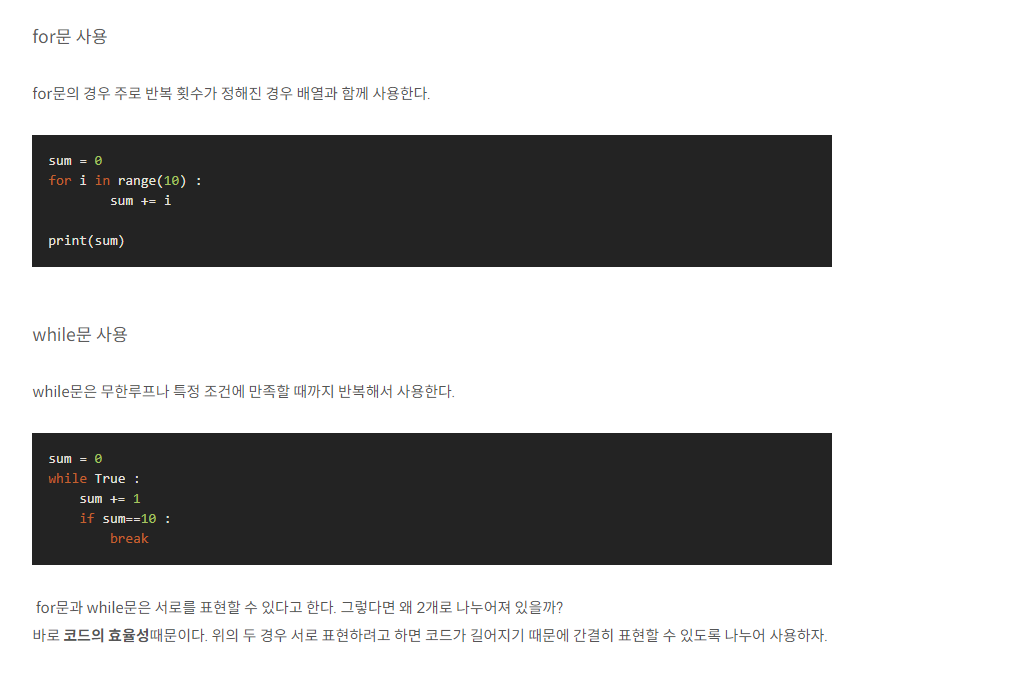

True든 뭐든 조건이 적혀있고
그 조건이 True일때만 도는게 while!

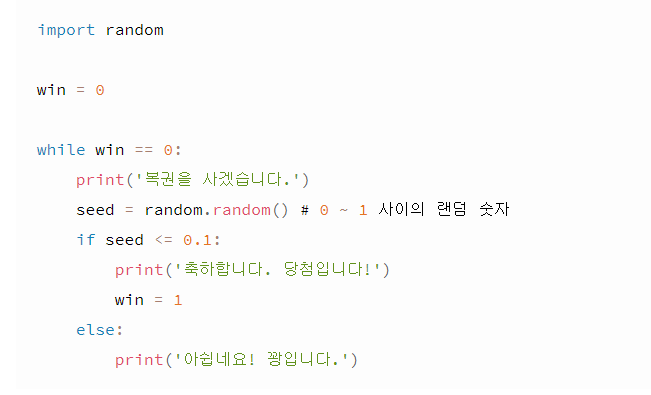


In [ ]:
a = []
for i in df2.yearLst:
    if '2002' in i:
        a.append(i)

In [ ]:
print(a)

[['2002', '2006', '2010', '2014'], ['1998', '2002', '2006'], ['1994', '1998', '2002'], ['1998', '2002'], ['1998', '2002'], ['1998', '2002'], ['1998', '2002', '2006', '2010'], ['2002', '2010'], ['1994', '1998', '2002'], ['2002', '2010'], ['1998', '2002', '2006'], ['1994', '1998', '2002'], ['1998', '2002'], ['1998', '2002', '2006'], ['2002', '2006', '2010'], ['1990', '1994', '2002'], ['1998', '2002', '2006'], ['1998', '2002', '2006'], ['1998', '2002'], ['1998', '2002'], ['2002', '2006'], ['1994', '2002', '2006'], ['2002', '2010'], ['2002', '2006'], ['2002', '2006'], ['2002', '2006'], ['1998', '2002', '2006'], ['2002', '2006'], ['2002'], ['1998', '2002', '2010'], ['2002', '2006', '2010', '2014'], ['2002', '2006'], ['1994', '1998', '2002', '2006'], ['2002'], ['2002', '2006'], ['2002', '2006', '2010'], ['2002'], ['1998', '2002', '2006'], ['1990', '1998', '2002'], ['1994', '1998', '2002'], ['2002', '2006'], ['1998', '2002'], ['2002', '2006', '2014'], ['2002', '2010'], ['2002', '2006'], ['199

In [ ]:
len(a)

156

In [ ]:
i = 0
for a in df2.yearLst:
    if '2002' in a:
        i += 1

In [ ]:
print(i)

156


In [ ]:
result = len(df2[df2.Years.str.contains('2002')])
print(result)

156


In [ ]:
df2.Years.str.contains('2002')

In [100]:
df2.Years

0       2002-2006-2010-2014
1            1998-2002-2006
2                 1970-1974
3                      1958
4       1958-1962-1966-1970
               ...         
1290                   1962
1291              1982-1990
1292                   1930
1293                   1930
1294              1954-1958
Name: Years, Length: 1250, dtype: object

이름에 ‘carlos’ 단어가 들어가는 선수의 숫자는 몇 명인가? (대, 소문자 구분 x)

In [ ]:
df2.head()

,Player,Goals,Years,Country,yearLst,check,LenCup
0,Miroslav Klose,16,2002-2006-2010-2014,Germany,"[2002, 2006, 2010, 2014]",True,4
1,Ronaldo,15,1998-2002-2006,Brazil,"[1998, 2002, 2006]",True,3
2,Gerd Muller,14,1970-1974,Germany,"[1970, 1974]",True,2
3,Just Fontaine,13,1958,France,[1958],True,1
4,Pele,12,1958-1962-1966-1970,Brazil,"[1958, 1962, 1966, 1970]",True,4


In [ ]:
#시리즈가 오면 str을 붙여줌

In [105]:
result = len(df2[df2.Player.str.lower().str.contains('carlos')])
print(result)

13


In [113]:
len(df2[df2.Player.str.contains('carlos', case = False)])

13

In [104]:
len(df2[df2.Player.str.upper().str.contains('CARLOS')])

13

월드컵 출전 횟수가 1회뿐인 선수들 중에서 가장 많은 득점을 올렸던 선수는 누구인가?

In [121]:
df2[df2['LenCup'] == 1][['Goals','Player']].sort_values(ascending = False, by='Goals').head(1)

,Goals,Player
3,13,Just Fontaine


In [ ]:
#groupby도 비슷?
df2[df2['LenCup'] == 1].Goals.sort_values(ascending = False) #goals중에서 정렬을 하겠다.
df2[df2['LenCup'] == 1].sort_values(ascending = False, by = 'Goals') #df2에서 goals를 기준으로 정렬 하겠다.

월드컵 출전횟수가 1회 뿐인 선수들이 가장 많은 국가는 어디인가?

In [131]:
answer = df2.loc[df2['LenCup'] == 1].Country.value_counts().index[0]
answer

'Brazil'